## Context Questionnaire

## Import packages 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import *

## Preprocessing 

In [2]:
# Data set loading
df_file = '/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/ContextQuestionnaire/ContextQuest.csv'
df = pd.read_csv(df_file, sep= ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Timestamp                                                                           22 non-null     object
 1   ID                                                                                  22 non-null     int64 
 2   1. The avatars increased my feeling of presence in the Virtual environment. ​       22 non-null     int64 
 3   2. The Virtual environment was more natural with avatars in it.                     22 non-null     int64 
 4   ​3. I felt like I was with other people in the city                                 22 non-null     int64 
 5   4. The exploration of the virtual town felt similar to exploring a real world city  22 non-null     int64 
dt

In [3]:
df.tail()

,Timestamp,ID,1. The avatars increased my feeling of presence in the Virtual environment. ​,2. The Virtual environment was more natural with avatars in it.,​3. I felt like I was with other people in the city,4. The exploration of the virtual town felt similar to exploring a real world city
17,4/21/2022 12:36:34,5531,6,7,2,2
18,5/4/2022 15:06:47,7412,5,4,4,5
19,5/6/2022 9:58:24,4796,5,4,2,5
20,5/13/2022 15:02:41,3246,6,6,3,5
21,5/18/2022 10:08:57,9601,5,5,7,3


In [4]:
#Renaming the column names 
column_names = ['timeStamp', 'ID', 'item1', 'item2', 'item3', 'item4']
df.columns = column_names
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timeStamp  22 non-null     object
 1   ID         22 non-null     int64 
 2   item1      22 non-null     int64 
 3   item2      22 non-null     int64 
 4   item3      22 non-null     int64 
 5   item4      22 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [5]:
# From a wide format to a long format 
Long = pd.melt(df, id_vars=['ID'], value_vars=['item1', 'item2', 'item3', 'item4'], var_name='item', value_name='likert')
Long.head()

,ID,item,likert
0,8469,item1,4
1,7264,item1,7
2,3572,item1,4
3,365,item1,3
4,6642,item1,6


In [6]:
# Calculating the average for all context items 
df['ContextQ_average'] = df[['item1','item2', 'item3', 'item4']].mean(axis=1)
df.head()

,timeStamp,ID,item1,item2,item3,item4,ContextQ_average
0,11/12/2021 16:35:32,8469,4,6,4,4,4.5
1,11/15/2021 15:05:58,7264,7,7,3,5,5.5
2,11/17/2021 13:37:14,3572,4,5,2,5,4.0
3,11/18/2021 12:14:47,365,3,4,2,5,3.5
4,11/30/2021 11:31:21,6642,6,6,3,3,4.5


## Write CSV file

In [7]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
df.to_csv('ContextQuest.csv')

In [8]:
df.describe()

,ID,item1,item2,item3,item4,ContextQ_average
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,5784.909091,4.681818,5.000000,2.772727,3.681818,4.034091
std,2646.825320,1.492405,1.309307,1.509709,1.460149,0.824821
min,365.000000,1.000000,2.000000,1.000000,2.000000,1.750000
25%,4026.000000,4.000000,4.000000,2.000000,2.000000,3.750000
50%,5636.000000,5.000000,5.000000,2.500000,3.500000,4.125000
75%,7734.500000,5.750000,6.000000,3.000000,5.000000,4.500000
max,9601.000000,7.000000,7.000000,7.000000,6.000000,5.500000


## Data Visualization

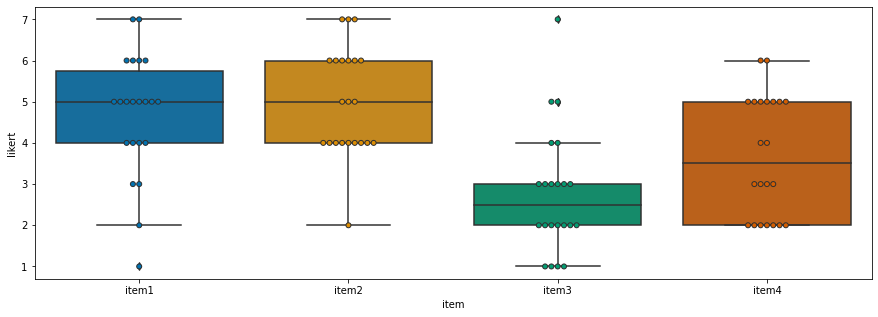

In [9]:
sns.set_palette('colorblind')
dy='item'; dx='likert'; ort='H';  sigma = .2
#Change y axist from 1 to seven
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data= Long, x=dy, y=dx, ax=ax)
sns.swarmplot(data= Long, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()

In [10]:
LongAv = pd.melt(df, id_vars=['ID'], value_vars=['ContextQ_average'], var_name='item', value_name='likert')
LongAv.head()

,ID,item,likert
0,8469,ContextQ_average,4.5
1,7264,ContextQ_average,5.5
2,3572,ContextQ_average,4.0
3,365,ContextQ_average,3.5
4,6642,ContextQ_average,4.5


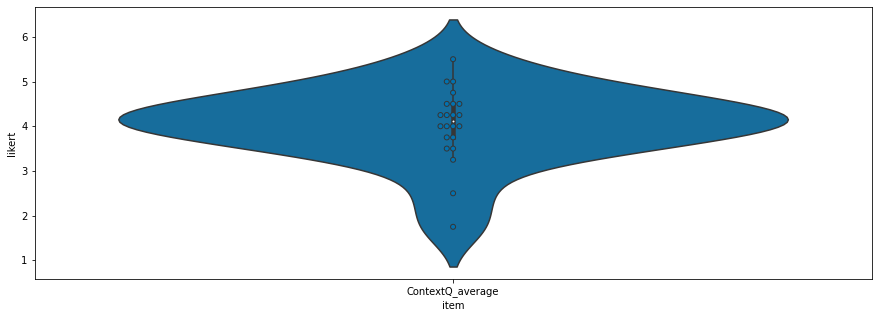

In [11]:
dy='item'; dx='likert'; ort='H'; pal = sns.set_palette('colorblind'); sigma = .2

fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(data= LongAv, x=dy, y=dx, ax=ax)
sns.swarmplot(data= LongAv, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()